In [1]:
#Importind dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
# Read CSV file and display df
TSLA = pd.read_csv('Resources/TSLA.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [3]:
#Features (number of trading days, columns)
TSLA.shape

(2843, 7)

In [4]:
TSLA = TSLA['Open'].values
TSLA = TSLA.reshape(-1, 1)

In [5]:
#Split data into train and test
dataset_train = np.array(TSLA[:int(TSLA.shape[0]*0.8)])
dataset_test = np.array(TSLA[int(TSLA.shape[0]*0.8):])

In [6]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [7]:
#Create function for datasets
def create_dataset(df):
    x = []
    y = []
    for i in range(60, TSLA.shape[0]):
        x.append(TSLA[i-60:i, 0])
        y.append(TSLA[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [8]:
#Create training and testing data
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [9]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Building a Sequential model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [17]:
#Reshape data again
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
#Fit data and save model
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
87/87 [==============================] - 18s 147ms/step - loss: 44976.8828
Epoch 2/50
87/87 [==============================] - 23s 269ms/step - loss: 43216.2656
Epoch 3/50
87/87 [==============================] - 17s 198ms/step - loss: 42028.3750
Epoch 4/50
87/87 [==============================] - 15s 174ms/step - loss: 40995.8906
Epoch 5/50
87/87 [==============================] - 15s 170ms/step - loss: 40168.2812
Epoch 6/50
87/87 [==============================] - 16s 183ms/step - loss: 39433.6133
Epoch 7/50
87/87 [==============================] - 16s 186ms/step - loss: 38853.8633
Epoch 8/50
87/87 [==============================] - 16s 179ms/step - loss: 38285.8516
Epoch 9/50
87/87 [==============================] - 15s 171ms/step - loss: 37856.1484
Epoch 10/50
87/87 [==============================] - 15s 174ms/step - loss: 37557.7656
Epoch 11/50
87/87 [==============================] - 15s 169ms/step - loss: 37251.4062
Epoch 12/50
87/87 [==============================] -

In [20]:
#Loading model
model = load_model('stock_prediction.h5')

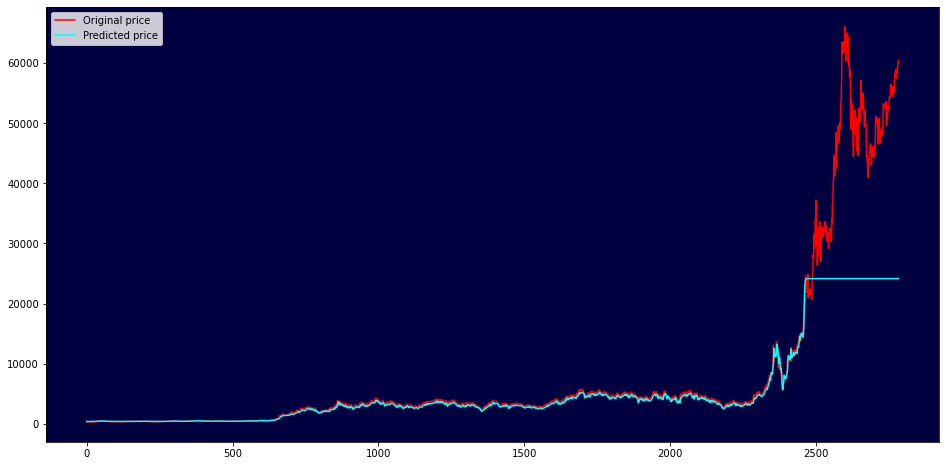

In [21]:
#Plotting the results
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()